In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [27]:
import numpy as np

In [28]:
Train = pd.read_csv(r"C:\Users\kerrs\Desktop\elo-merchant-category-recommendation\train.csv", parse_dates=['first_active_month'])
Train.shape

(201917, 6)

In [29]:
Train.dtypes

first_active_month    datetime64[ns]
card_id                       object
feature_1                      int64
feature_2                      int64
feature_3                      int64
target                       float64
dtype: object

In [62]:
Train.head(10)

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-06-01  C_ID_92a2005557          5          2          1   
1         2017-01-01  C_ID_3d0044924f          4          1          0   
2         2016-08-01  C_ID_d639edf6cd          2          2          0   
3         2017-09-01  C_ID_186d6a6901          4          3          0   
4         2017-11-01  C_ID_cdbd2c0db2          1          3          0   
5         2016-09-01  C_ID_0894217f2f          4          2          0   
6         2016-12-01  C_ID_7e63323c00          3          2          1   
7         2017-09-01  C_ID_dfa21fc124          3          2          1   
8         2017-08-01  C_ID_fe0fdac8ea          2          1          0   
9         2016-08-01  C_ID_bf62c0b49d          2          2          0   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749  
5  0.871585  
6  0.230129  
7  2.135850  
8 -0.065406  
9  0.300062

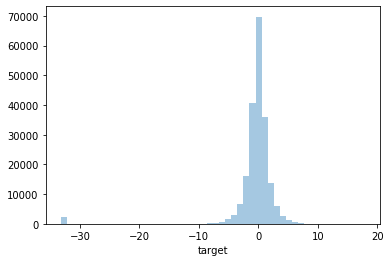

In [63]:
sns.distplot(Train['target'], kde = False)

In [30]:
Merchant = pd.read_csv(r"C:\Users\kerrs\Desktop\elo-merchant-category-recommendation\merchants.csv")

In [31]:
Merchant.shape

(334696, 22)

In [104]:
Merchant.describe()

merchant_group_id  merchant_category_id   subsector_id    numerical_1  \
count      334696.000000         334696.000000  334696.000000  334696.000000   
mean        31028.736143            423.131663      25.116404       0.011476   
std         31623.043426            252.898046       9.807371       1.098154   
min             1.000000             -1.000000      -1.000000      -0.057471   
25%          3612.000000            222.000000      19.000000      -0.057471   
50%         19900.000000            373.000000      27.000000      -0.057471   
75%         51707.250000            683.000000      33.000000      -0.047556   
max        112586.000000            891.000000      41.000000     183.735111   

         numerical_2  avg_sales_lag3  avg_purchases_lag3  active_months_lag3  \
count  334696.000000   334683.000000        3.346960e+05       334696.000000   
mean        0.008103       13.832993                 inf            2.994108   
std         1.070497     2395.489999                 NaN            0.095247   
min        -0.057471      -82.130000        3.334953e-01            1.000000   
25%        -0.057471        0.880000        9.236499e-01            3.000000   
50%        -0.057471        1.000000        1.016667e+00            3.000000   
75%        -0.047556        1.160000        1.146522e+00            3.000000   
max       182.079322   851844.640000                 inf            3.000000   

       avg_sales_lag6  avg_purchases_lag6  active_months_lag6  \
count    3.346830e+05        3.346960e+05       334696.000000   
mean     2.165079e+01                 inf            5.947397   
std      3.947108e+03                 NaN            0.394936   
min     -8.213000e+01        1.670447e-01            1.000000   
25%      8.500000e-01        9.022475e-01            6.000000   
50%      1.010000e+00        1.026961e+00            6.000000   
75%      1.230000e+00        1.215575e+00            6.000000   
max      1.513959e+06                 inf            6.000000   

       avg_sales_lag12  avg_purchases_lag12  active_months_lag12  \
count     3.346830e+05         3.346960e+05        334696.000000   
mean      2.522771e+01                  inf            11.599335   
std       5.251842e+03                  NaN             1.520138   
min      -8.213000e+01         9.832954e-02             1.000000   
25%       8.500000e-01         8.983333e-01            12.000000   
50%       1.020000e+00         1.043361e+00            12.000000   
75%       1.290000e+00         1.266480e+00            12.000000   
max       2.567408e+06                  inf            12.000000   

             city_id       state_id     category_2  
count  334696.000000  334696.000000  322809.000000  
mean      102.917926      11.860942       2.380002  
std       107.090673       6.176889       1.562661  
min        -1.000000      -1.000000       1.000000  
25%        -1.000000       9.000000       1.000000  
50%        69.000000       9.000000       2.000000  
75%       182.000000      16.000000       4.000000  
max       347.000000      24.000000       5.000000

In [33]:
New_Actions = pd.read_csv(r"C:\Users\kerrs\Desktop\elo-merchant-category-recommendation\new_merchant_transactions.csv", parse_dates=['purchase_date'])

In [34]:
New_Actions.shape

(1963031, 14)

In [35]:
New_Actions.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_415bb3a509      107          N             1   
1               Y  C_ID_415bb3a509      140          N             1   
2               Y  C_ID_415bb3a509      330          N             1   
3               Y  C_ID_415bb3a509       -1          Y             1   
4               Y  C_ID_ef55cf8d4b       -1          Y             1   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          B                   307  M_ID_b0c793002c          1   
1          B                   307  M_ID_88920c89e8          1   
2          B                   507  M_ID_ad5237ef6b          2   
3          B                   661  M_ID_9e84cda3b1          1   
4          B                   166  M_ID_3c86fa3831          1   

   purchase_amount       purchase_date  category_2  state_id  subsector_id  
0        -0.557574 2018-03-11 14:57:36         1.0         9            19  
1        -0.569580 2018-03-19 18:53:37         1.0         9            19  
2        -0.551037 2018-04-26 14:08:44         1.0         9            14  
3        -0.671925 2018-03-07 09:43:21         NaN        -1             8  
4        -0.659904 2018-03-22 21:07:53         NaN        -1            29

In [36]:
History = pd.read_csv(r"C:\Users\kerrs\Desktop\elo-merchant-category-recommendation\historical_transactions.csv", nrows = 3000000, parse_dates=['purchase_date'])

In [37]:
History.tail(10)

authorized_flag          card_id  city_id category_1  installments  \
2999990               Y  C_ID_43384d07f4       -1          Y             1   
2999991               Y  C_ID_43384d07f4      137          N             1   
2999992               Y  C_ID_43384d07f4      137          N             1   
2999993               Y  C_ID_43384d07f4       69          N             1   
2999994               Y  C_ID_43384d07f4      137          N             1   
2999995               Y  C_ID_43384d07f4      137          N             1   
2999996               Y  C_ID_2c47a53889       -1          N             1   
2999997               Y  C_ID_2c47a53889       51          N             1   
2999998               Y  C_ID_2c47a53889       69          N             1   
2999999               Y  C_ID_2c47a53889       51          N             1   

        category_3  merchant_category_id      merchant_id  month_lag  \
2999990          B                   879  M_ID_00a6ca8a8a         -1   
2999991          B                   278  M_ID_3f897c07d9         -2   
2999992          B                   278  M_ID_3f897c07d9         -3   
2999993          B                   879  M_ID_00a6ca8a8a         -2   
2999994          B                   278  M_ID_3f897c07d9         -2   
2999995          B                   842  M_ID_aa441c15ff         -5   
2999996          B                   690  M_ID_f95833eb95         -2   
2999997          B                   705  M_ID_7379a348db         -2   
2999998          B                   879  M_ID_00a6ca8a8a          0   
2999999          B                   842  M_ID_8db2a7039a         -2   

         purchase_amount       purchase_date  category_2  state_id  \
2999990        -0.716855 2017-06-12 18:19:57         NaN        -1   
2999991        -0.728876 2017-05-08 22:52:38         3.0        19   
2999992        -0.701828 2017-04-28 19:36:04         3.0        19   
2999993        -0.725871 2017-05-11 22:14:10         1.0         9   
2999994        -0.676283 2017-05-07 21:48:07         3.0        19   
2999995        -0.734887 2017-02-28 11:13:27         3.0        19   
2999996         0.148672 2017-10-20 22:04:22         NaN        -1   
2999997        -0.683796 2017-10-19 14:46:56         1.0        16   
2999998        -0.597154 2017-12-19 13:55:35         1.0         9   
2999999        -0.707388 2017-10-10 23:23:02         1.0        16   

         subsector_id  
2999990            29  
2999991            37  
2999992            37  
2999993            29  
2999994            37  
2999995            37  
2999996             1  
2999997            33  
2999998            29  
2999999            37

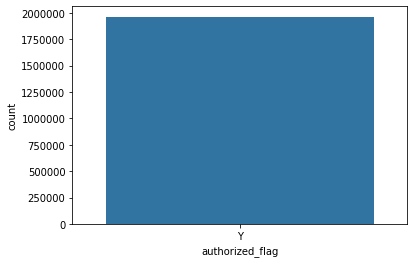

In [38]:
ax = sns.countplot(x = 'authorized_flag', data = New_Actions)

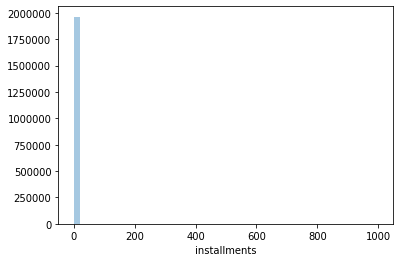

In [39]:
ax = sns.distplot(New_Actions['installments'], kde = False)

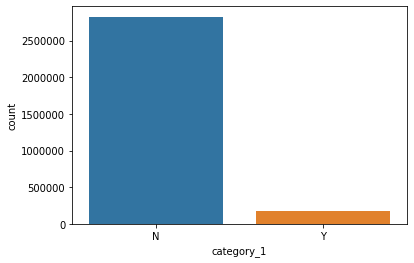

In [40]:
ax = sns.countplot(x = 'category_1', data = History)

In [41]:
New_Actions['purchase_amount_integer'] = New_Actions.purchase_amount.apply(lambda x: x == np.round(x))
print(New_Actions.groupby('purchase_amount_integer')['card_id'].count())

purchase_amount_integer
False    1963031
Name: card_id, dtype: int64


In [42]:
New_Actions['purchase_amount_new'] = np.round(New_Actions['purchase_amount'] / 0.00150265118 + 497.06,2)

In [43]:
New_Actions.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_415bb3a509      107          N             1   
1               Y  C_ID_415bb3a509      140          N             1   
2               Y  C_ID_415bb3a509      330          N             1   
3               Y  C_ID_415bb3a509       -1          Y             1   
4               Y  C_ID_ef55cf8d4b       -1          Y             1   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          B                   307  M_ID_b0c793002c          1   
1          B                   307  M_ID_88920c89e8          1   
2          B                   507  M_ID_ad5237ef6b          2   
3          B                   661  M_ID_9e84cda3b1          1   
4          B                   166  M_ID_3c86fa3831          1   

   purchase_amount       purchase_date  category_2  state_id  subsector_id  \
0        -0.557574 2018-03-11 14:57:36         1.0         9            19   
1        -0.569580 2018-03-19 18:53:37         1.0         9            19   
2        -0.551037 2018-04-26 14:08:44         1.0         9            14   
3        -0.671925 2018-03-07 09:43:21         NaN        -1             8   
4        -0.659904 2018-03-22 21:07:53         NaN        -1            29   

   purchase_amount_integer  purchase_amount_new  
0                    False               126.00  
1                    False               118.01  
2                    False               130.35  
3                    False                49.90  
4                    False                57.90

In [44]:
New_Actions['USA'] = New_Actions['purchase_amount_new'] * .25
New_Actions.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_415bb3a509      107          N             1   
1               Y  C_ID_415bb3a509      140          N             1   
2               Y  C_ID_415bb3a509      330          N             1   
3               Y  C_ID_415bb3a509       -1          Y             1   
4               Y  C_ID_ef55cf8d4b       -1          Y             1   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          B                   307  M_ID_b0c793002c          1   
1          B                   307  M_ID_88920c89e8          1   
2          B                   507  M_ID_ad5237ef6b          2   
3          B                   661  M_ID_9e84cda3b1          1   
4          B                   166  M_ID_3c86fa3831          1   

   purchase_amount       purchase_date  category_2  state_id  subsector_id  \
0        -0.557574 2018-03-11 14:57:36         1.0         9            19   
1        -0.569580 2018-03-19 18:53:37         1.0         9            19   
2        -0.551037 2018-04-26 14:08:44         1.0         9            14   
3        -0.671925 2018-03-07 09:43:21         NaN        -1             8   
4        -0.659904 2018-03-22 21:07:53         NaN        -1            29   

   purchase_amount_integer  purchase_amount_new      USA  
0                    False               126.00  31.5000  
1                    False               118.01  29.5025  
2                    False               130.35  32.5875  
3                    False                49.90  12.4750  
4                    False                57.90  14.4750

In [45]:
History.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_4e6213e9bc       88          N             0   
1               Y  C_ID_4e6213e9bc       88          N             0   
2               Y  C_ID_4e6213e9bc       88          N             0   
3               Y  C_ID_4e6213e9bc       88          N             0   
4               Y  C_ID_4e6213e9bc       88          N             0   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          A                    80  M_ID_e020e9b302         -8   
1          A                   367  M_ID_86ec983688         -7   
2          A                    80  M_ID_979ed661fc         -6   
3          A                   560  M_ID_e6d5ae8ea6         -5   
4          A                    80  M_ID_e020e9b302        -11   

   purchase_amount       purchase_date  category_2  state_id  subsector_id  
0        -0.703331 2017-06-25 15:33:07         1.0        16            37  
1        -0.733128 2017-07-15 12:10:45         1.0        16            16  
2        -0.720386 2017-08-09 22:04:29         1.0        16            37  
3        -0.735352 2017-09-02 10:06:26         1.0        16            34  
4        -0.722865 2017-03-10 01:14:19         1.0        16            37

In [46]:
History['purchase_amount_integer'] = History.purchase_amount.apply(lambda x: x == np.round(x))
print(History.groupby('purchase_amount_integer')['card_id'].count())

purchase_amount_integer
False    2999998
True           2
Name: card_id, dtype: int64


In [47]:
History['purchase_amount_new'] = np.round(History['purchase_amount'] / 0.00150265118 + 497.06,2)

In [48]:
History['USA'] = History['purchase_amount_new'] * .25
History.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_4e6213e9bc       88          N             0   
1               Y  C_ID_4e6213e9bc       88          N             0   
2               Y  C_ID_4e6213e9bc       88          N             0   
3               Y  C_ID_4e6213e9bc       88          N             0   
4               Y  C_ID_4e6213e9bc       88          N             0   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          A                    80  M_ID_e020e9b302         -8   
1          A                   367  M_ID_86ec983688         -7   
2          A                    80  M_ID_979ed661fc         -6   
3          A                   560  M_ID_e6d5ae8ea6         -5   
4          A                    80  M_ID_e020e9b302        -11   

   purchase_amount       purchase_date  category_2  state_id  subsector_id  \
0        -0.703331 2017-06-25 15:33:07         1.0        16            37   
1        -0.733128 2017-07-15 12:10:45         1.0        16            16   
2        -0.720386 2017-08-09 22:04:29         1.0        16            37   
3        -0.735352 2017-09-02 10:06:26         1.0        16            34   
4        -0.722865 2017-03-10 01:14:19         1.0        16            37   

   purchase_amount_integer  purchase_amount_new     USA  
0                    False                29.00  7.2500  
1                    False                 9.17  2.2925  
2                    False                17.65  4.4125  
3                    False                 7.69  1.9225  
4                    False                16.00  4.0000

In [49]:
History.dtypes

authorized_flag                    object
card_id                            object
city_id                             int64
category_1                         object
installments                        int64
category_3                         object
merchant_category_id                int64
merchant_id                        object
month_lag                           int64
purchase_amount                   float64
purchase_date              datetime64[ns]
category_2                        float64
state_id                            int64
subsector_id                        int64
purchase_amount_integer              bool
purchase_amount_new               float64
USA                               float64
dtype: object

In [50]:
Merchant.active_months_lag12.value_counts()

12    305101
11      4449
10      4143
9       3824
8       3756
7       3274
6       2737
5       2276
4       2050
3       1652
2        896
1        538
Name: active_months_lag12, dtype: int64

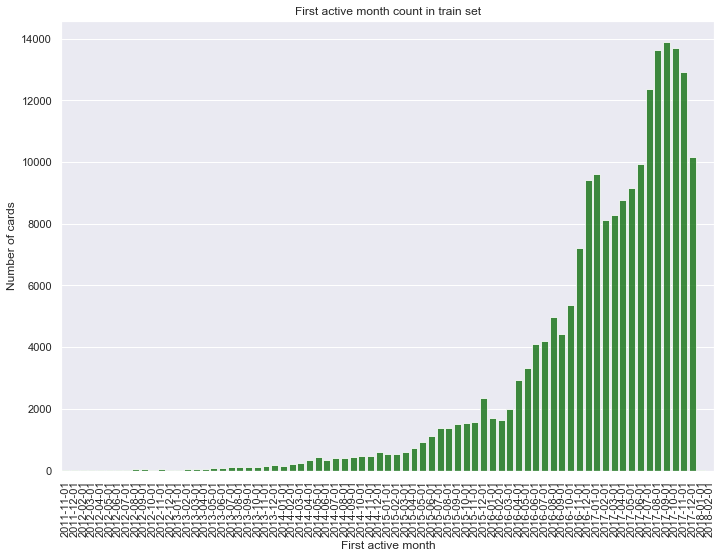

In [83]:
cnt_srs = Train['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
ax = sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train set")
plt.show()

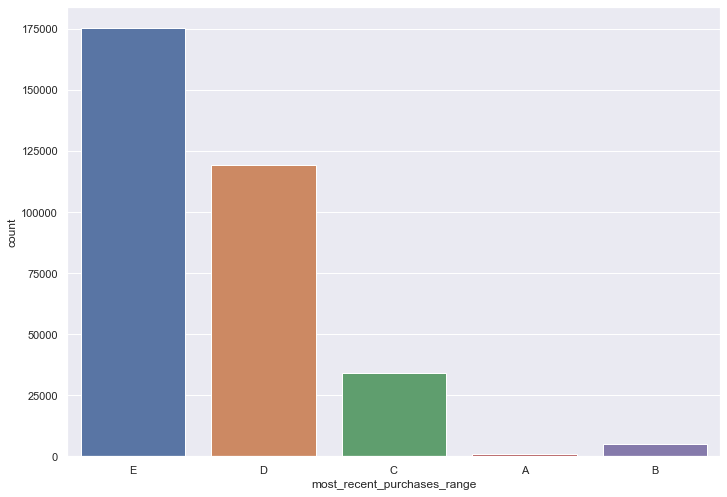

In [84]:
sns.countplot(x = 'most_recent_purchases_range',  data = Merchant)

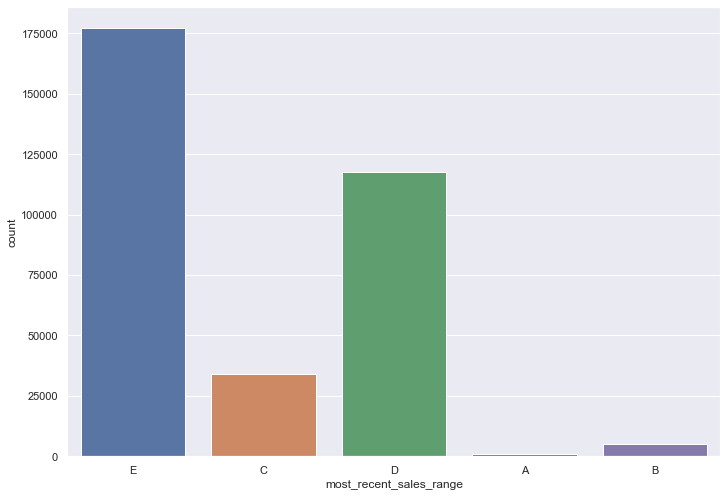

In [85]:
sns.countplot(x = 'most_recent_sales_range',  data = Merchant)

In [54]:
inner_join = pd.merge(Train, New_Actions, on = 'card_id', how = 'inner')


In [55]:
inner_join.shape

(1219685, 22)

In [56]:
Super_Join = pd.merge(inner_join, Merchant, on = 'merchant_id', how = 'inner')
Super_Join.shape

(1223315, 43)

In [57]:
Super_Join.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-06-01  C_ID_92a2005557          5          2          1   
1         2017-10-01  C_ID_f0975077c6          2          3          0   
2         2017-11-01  C_ID_cda6f8466a          2          2          0   
3         2017-07-01  C_ID_b69187377b          2          1          0   
4         2016-12-01  C_ID_f1747588a5          2          1          0   

     target authorized_flag  city_id_x category_1_x  installments  ...  \
0 -0.820283               Y         19            N             0  ...   
1  1.272357               Y        138            N             1  ...   
2 -0.340947               Y        199            N             0  ...   
3 -1.603394               Y         19            N             1  ...   
4  0.105042               Y        213            N             1  ...   

  avg_sales_lag6  avg_purchases_lag6 active_months_lag6  avg_sales_lag12  \
0           1.25            1.226935                  6             1.29   
1           1.25            1.226935                  6             1.29   
2           1.25            1.226935                  6             1.29   
3           1.25            1.226935                  6             1.29   
4           1.25            1.226935                  6             1.29   

   avg_purchases_lag12 active_months_lag12  category_4  city_id_y  state_id_y  \
0             1.261291                  12           N         -1           9   
1             1.261291                  12           N         -1           9   
2             1.261291                  12           N         -1           9   
3             1.261291                  12           N         -1           9   
4             1.261291                  12           N         -1           9   

   category_2_y  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0  

[5 rows x 43 columns]

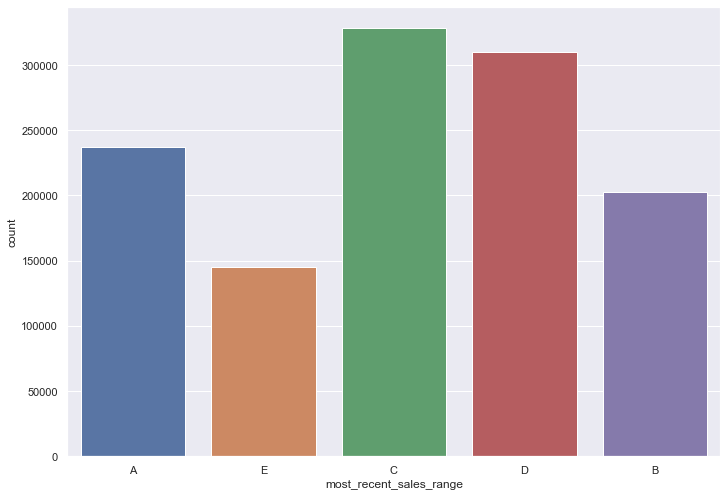

In [86]:
sns.countplot(x = 'most_recent_sales_range',  data = Super_Join)

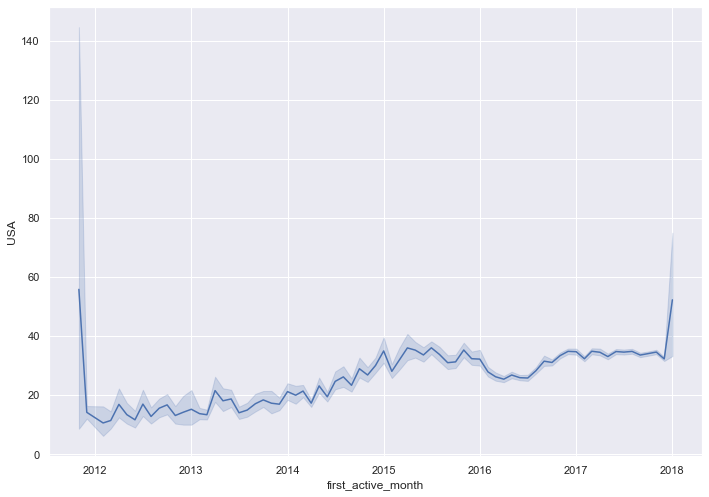

In [87]:
sns.lineplot(x= "first_active_month", y = 'USA', data=Super_Join)

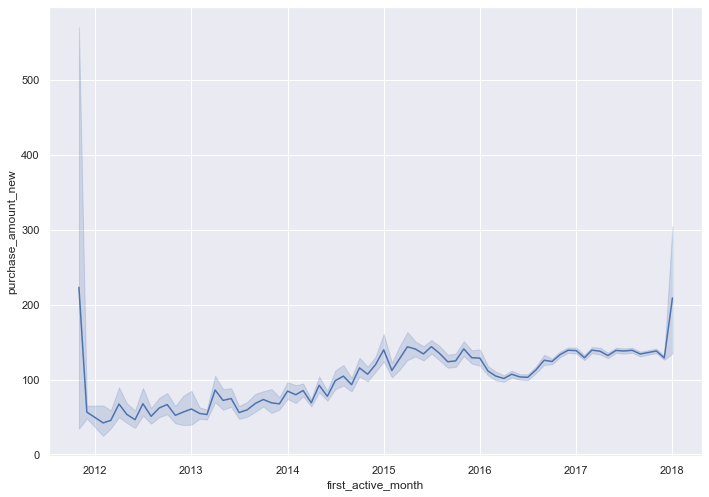

In [88]:
sns.lineplot(x= "first_active_month", y = 'purchase_amount_new', data=Super_Join)

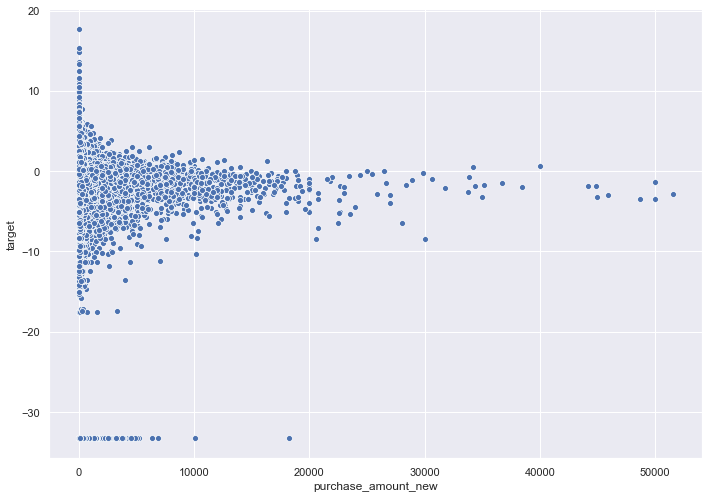

In [75]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid') 
ax = sns.scatterplot(x="purchase_amount_new", y="target", data=Super_Join)

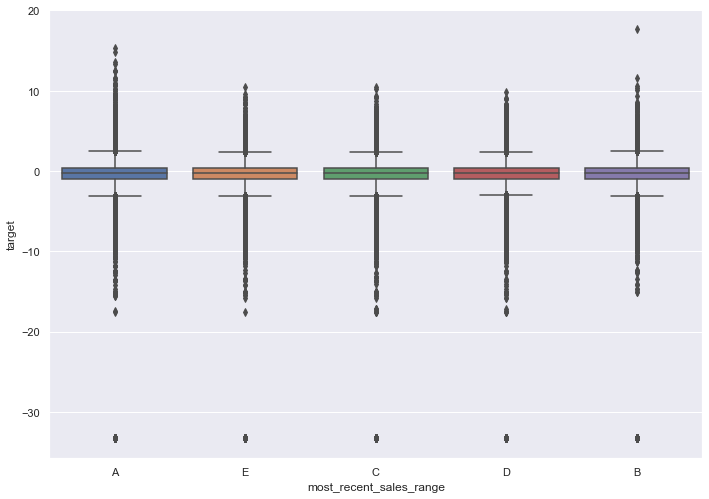

In [72]:
ax = sns.boxplot(x = 'most_recent_sales_range', y = 'target', data = Super_Join)

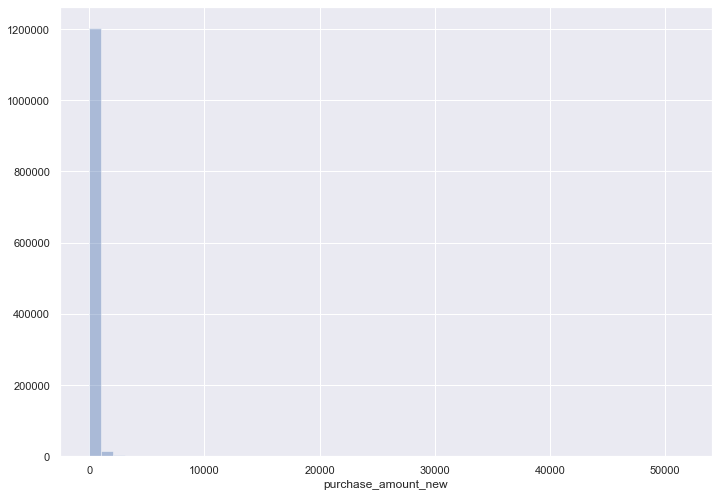

In [89]:
ax = sns.distplot(Super_Join['purchase_amount_new'], kde = False)

In [91]:
Super_Join['purchase_amount_new'].min()

0.01

In [96]:
Super_Join['purchase_amount_new'].tail(30)

1223285      42.50
1223286      58.00
1223287      60.00
1223288    1507.00
1223289      49.90
1223290     100.00
1223291      22.00
1223292      65.00
1223293     230.00
1223294      56.00
1223295     600.00
1223296     114.70
1223297      15.00
1223298     159.00
1223299      22.00
1223300      13.70
1223301     233.00
1223302      13.30
1223303     134.00
1223304    1096.00
1223305     200.00
1223306      56.25
1223307      15.40
1223308      18.90
1223309     137.94
1223310    1350.00
1223311      12.31
1223312       2.00
1223313     382.80
1223314     279.90
Name: purchase_amount_new, dtype: float64

In [102]:
pd.set_option('display.max_columns', None)

In [103]:
Super_Join.describe()

feature_1     feature_2     feature_3        target     city_id_x  \
count  1.223315e+06  1.223315e+06  1.223315e+06  1.223315e+06  1.223315e+06   
mean   3.060553e+00  1.710420e+00  5.131744e-01 -5.958654e-01  1.332888e+02   
std    1.269016e+00  7.385017e-01  4.998266e-01  2.920348e+00  1.011442e+02   
min    1.000000e+00  1.000000e+00  0.000000e+00 -3.321928e+01 -1.000000e+00   
25%    2.000000e+00  1.000000e+00  0.000000e+00 -1.006653e+00  6.900000e+01   
50%    3.000000e+00  2.000000e+00  1.000000e+00 -2.479475e-01  1.070000e+02   
75%    4.000000e+00  2.000000e+00  1.000000e+00  3.655180e-01  2.120000e+02   
max    5.000000e+00  3.000000e+00  1.000000e+00  1.767572e+01  3.470000e+02   

       installments  merchant_category_id_x     month_lag  purchase_amount  \
count  1.223315e+06            1.223315e+06  1.223315e+06     1.223315e+06   
mean   6.956426e-01            4.351352e+02  1.475416e+00    -5.493544e-01   
std    1.538219e+00            2.491526e+02  4.993955e-01     6.684542e-01   
min   -1.000000e+00           -1.000000e+00  1.000000e+00    -7.468928e-01   
25%    0.000000e+00            2.780000e+02  1.000000e+00    -7.164791e-01   
50%    1.000000e+00            3.690000e+02  1.000000e+00    -6.747805e-01   
75%    1.000000e+00            6.830000e+02  2.000000e+00    -5.816162e-01   
max    9.990000e+02            8.910000e+02  2.000000e+00     7.668290e+01   

       category_2_x    state_id_x  subsector_id_x  purchase_amount_new  \
count  1.153232e+06  1.223315e+06    1.223315e+06         1.223315e+06   
mean   2.173533e+00  1.084919e+01    2.597692e+01         1.314699e+02   
std    1.521675e+00  6.003111e+00    1.008604e+01         4.448499e+02   
min    1.000000e+00 -1.000000e+00   -1.000000e+00         1.000000e-02   
25%    1.000000e+00  9.000000e+00    1.900000e+01         2.025000e+01   
50%    1.000000e+00  9.000000e+00    2.900000e+01         4.800000e+01   
75%    3.000000e+00  1.500000e+01    3.400000e+01         1.100000e+02   
max    5.000000e+00  2.400000e+01    4.100000e+01         5.152880e+04   

                USA  merchant_group_id  merchant_category_id_y  \
count  1.223315e+06       1.223315e+06            1.223315e+06   
mean   3.286748e+01       2.349140e+04            4.264251e+02   
std    1.112125e+02       3.180083e+04            2.394848e+02   
min    2.500000e-03       1.000000e+00            2.000000e+00   
25%    5.062500e+00       3.500000e+01            2.780000e+02   
50%    1.200000e+01       5.918000e+03            3.830000e+02   
75%    2.750000e+01       3.977500e+04            6.610000e+02   
max    1.288220e+04       1.125860e+05            8.910000e+02   

       subsector_id_y   numerical_1   numerical_2  avg_sales_lag3  \
count    1.223315e+06  1.223315e+06  1.223315e+06    1.223110e+06   
mean     2.533985e+01  3.549602e+00  3.450842e+00    4.595435e+01   
std      1.054804e+01  1.689495e+01  1.661991e+01    6.122237e+03   
min      1.000000e+00 -5.747065e-02 -5.747065e-02    3.300000e-01   
25%      1.900000e+01 -5.747065e-02 -5.747065e-02    9.500000e-01   
50%      2.700000e+01 -4.755575e-02 -5.747065e-02    1.020000e+00   
75%      3.400000e+01  2.003169e-01  3.176349e-02    1.090000e+00   
max      4.100000e+01  1.837351e+02  1.820793e+02    8.518446e+05   

       avg_purchases_lag3  active_months_lag3  avg_sales_lag6  \
count        1.223315e+06        1.223315e+06    1.223110e+06   
mean         4.693855e+00        2.999764e+00    4.558522e+01   
std          4.405880e+02        1.986890e-02    5.923644e+03   
min          3.334953e-01        1.000000e+00    1.600000e-01   
25%          9.733591e-01        3.000000e+00    9.200000e-01   
50%          1.029376e+00        3.000000e+00    1.030000e+00   
75%          1.097360e+00        3.000000e+00    1.140000e+00   
max          6.185133e+04        3.000000e+00    1.513959e+06   

       avg_purchases_lag6  active_months_lag6  avg_sales_lag12  \
count        1.223315e+06        1.223315e+06     1.223110e

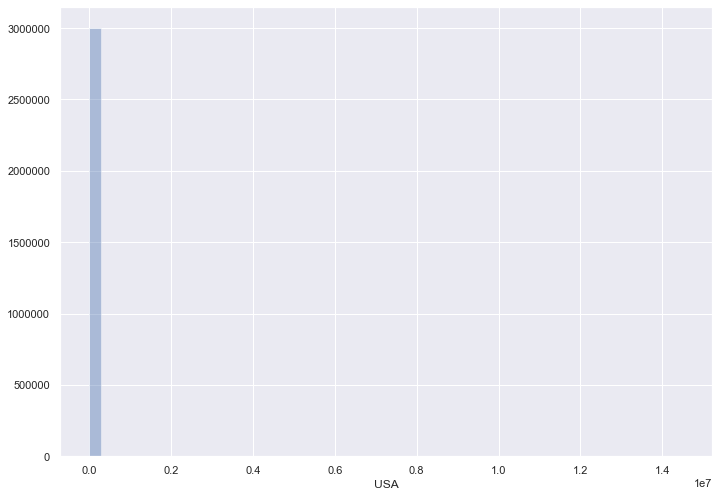

In [77]:
ax = sns.distplot(History['USA'], kde = False)

In [82]:
Old_Join = pd.merge(Train, History, on = 'card_id', how = 'inner')
Old_Join.shape

(1863511, 22)

In [97]:
HIst_Join = pd.merge(Old_Join, Merchant, on = 'merchant_id', how = 'inner')

In [98]:
HIst_Join.shape

(1926860, 43)

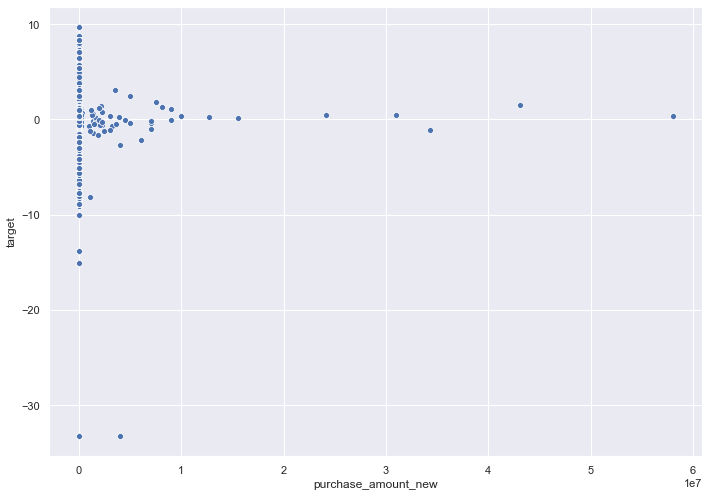

In [99]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid') 
ax = sns.scatterplot(x="purchase_amount_new", y="target", data=HIst_Join)